# <center>Exercise 1 Bollinger Bands</center>

**Algorithmic Trading Strategy (Bollinger Bands)**

The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.


Exercise objective:
- Apply Bollinger Band technique to set buying and selling signals for stock trading.
- Set stock trading strategy and calculate the profit made and return rate based on the strategy.
- Try different window sizes and numbers of standard deviations, then find out the best return rate.
- Visualize stock trend, Bollinger Band, buying and selling signals.

## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
#import yfinance as yf

import os
import pandas_datareader as pdr
from datetime import datetime

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Load stock data and try different windows and std to find out the best return rate

Take GME stock as an example to go through the whole process. </br>
Historical stock data can be loaded by different ways. Tiingo is used in this exercise.

In [3]:
os.environ["TIINGO_API_KEY"] = "f287ab36db9e96ace2b527e69823b626c8f0aa2b"

start = datetime(2022,1,1)  # Historical data start date
end = datetime.now()        # Historical data end date (2023-06-02)

windows = [5, 10, 15, 20, 25, 30]
allReturnRate = []

# Try options in the list of windows
for w in windows:  
    print(f'window: {w}')
    print('='*50)
    
    # Retrieve historical data from Tiingo
    df = pdr.get_data_tiingo('GME', api_key=os.getenv('TIINGO_API_KEY'), start=start, end=end)  
    
    # Drop index "symbol".
    df = pd.DataFrame(df.values,
                     index=df.index.droplevel(0),
                     columns=df.columns)

    
    ## Simple Moving Average (SMA) for w days
    df['SMA'] = df.adjClose.rolling(window = w).mean()
    
    ## Standard deviations for w days
    df['stddev'] = df.adjClose.rolling(window = w).std()
    
    # Try numbers of std from 2 to 3 with step 0.25, up to 5 numbers in total.
    for j in np.linspace(2.0, 3.0, num=5):
        print(f'number of std: {j}')
        
        # Upper is j standard deviations above SMA and Lower is j standard deviations below SMA
        df['Upper'] = df.SMA + j * df.stddev
        df['Lower'] = df.SMA - j * df.stddev
        
        ## Generate the Buy_signal and Sell_signal based on the strategy
        df['Buy_signal'] = np.where(df.adjClose < df.Lower, True, False)
        df['Sell_signal'] = np.where(df.adjClose > df.Upper, True, False)

        ## Remove nan value
        df = df.dropna()
        
        ################################################################################
        ## Improve buy and sell signal (Buy 1 Sell 1)
        ################################################################################
    
        ## Define new lists and stock_on_hand

        buy = []
        sell = []
        stock_on_hand = False

        ## change multiple buy and sell to only 1 buy and 1 sell

        for i in range(len(df)):
            if df.adjClose[i] < df.Lower[i]:
                if stock_on_hand == False:
                    buy.append(i)
                    stock_on_hand = True
            elif df.adjClose[i] > df.Upper[i]:
                if stock_on_hand == True:
                    sell.append(i)
                    stock_on_hand = False

        ################################################################################
        ## Calculate total profit
        ################################################################################

        share = 1000
        profit = 0

        for k in range(len(sell)):

            profit = profit - (df.iloc[buy[k]].adjClose * share)
            profit = profit + (df.iloc[sell[k]].adjClose * share)
                
        ################################################################################
        ## Calculate return rate
        ################################################################################
        
        # Close price at the beginning of the time period 
        C0 = df.iloc[0]['adjClose']
    
        # Calculate return rate (i.e. total profits divided 1000 shares times initial stock price) (%)
        returnRate = profit / (1000*C0)
        returnRate = '%.2f%%' %(returnRate*100)
        allReturnRate.append(returnRate)
                
        print(f'Return Rate:  {returnRate}')
        print('-'*30)   
    
allReturnRate.sort(reverse=True)
print(allReturnRate)

window: 5
number of std: 2.0
Return Rate:  0.00%
------------------------------
number of std: 2.25
Return Rate:  0.00%
------------------------------
number of std: 2.5
Return Rate:  0.00%
------------------------------
number of std: 2.75
Return Rate:  0.00%
------------------------------
number of std: 3.0
Return Rate:  0.00%
------------------------------
window: 10
number of std: 2.0
Return Rate:  -17.21%
------------------------------
number of std: 2.25
Return Rate:  10.72%
------------------------------
number of std: 2.5
Return Rate:  0.00%
------------------------------
number of std: 2.75
Return Rate:  0.00%
------------------------------
number of std: 3.0
Return Rate:  0.00%
------------------------------
window: 15
number of std: 2.0
Return Rate:  15.70%
------------------------------
number of std: 2.25
Return Rate:  44.36%
------------------------------
number of std: 2.5
Return Rate:  13.31%
------------------------------
number of std: 2.75
Return Rate:  -3.86%
------

> The best return rate is 205.58% with window=25 and number of std=2.5 when trading strategy is buy 1 sell 1.

## Visualize Bollinger Band with buying and selling signals at window 25 and number of std 2.5

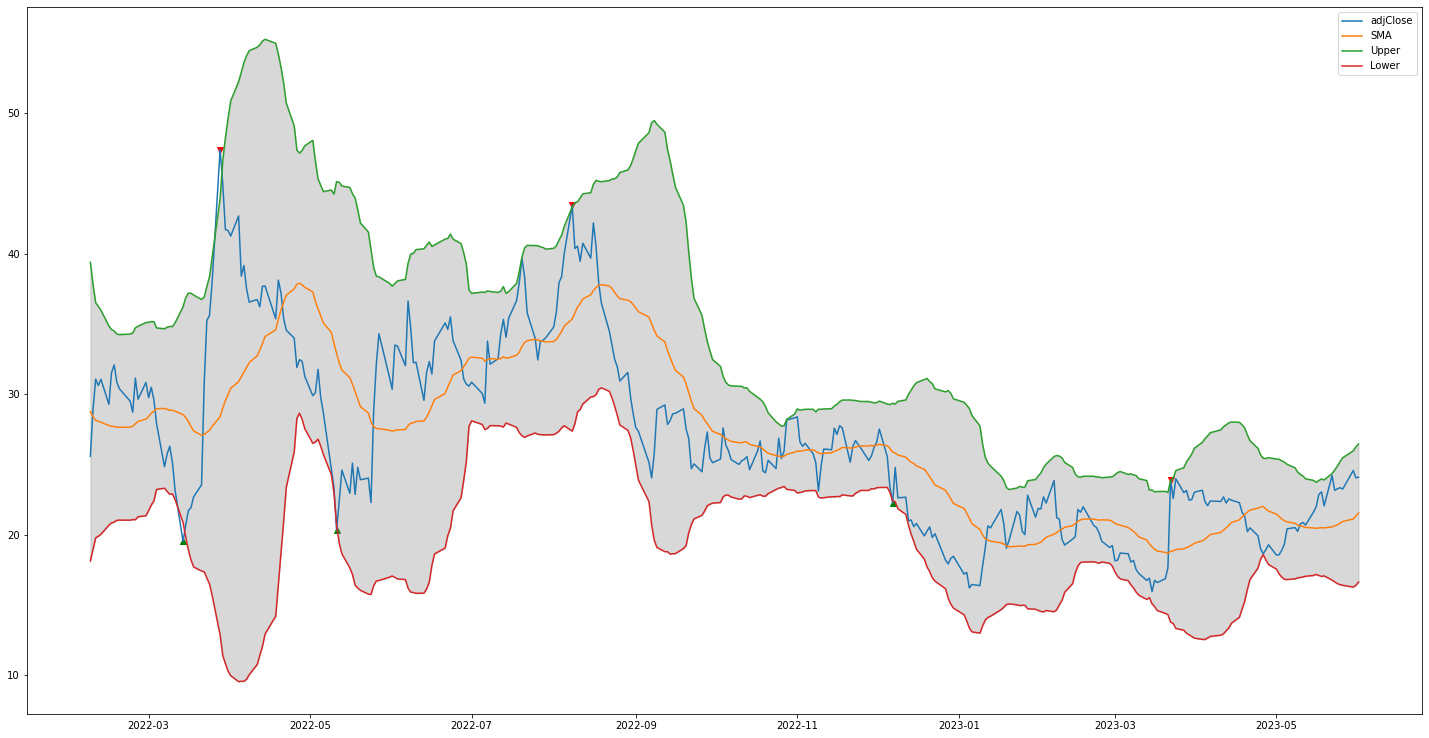

In [4]:
# Retrieve historical data from Tiingo
df = pdr.get_data_tiingo('GME', api_key=os.getenv('TIINGO_API_KEY'), start=start, end=end)  
    
# Drop index "symbol".
df = pd.DataFrame(df.values,
                  index=df.index.droplevel(0),
                  columns=df.columns)

## Simple Moving Average (SMA) for 25 days
df['SMA'] = df.adjClose.rolling(window=25).mean()

## Standard deviations for 25 days
df['stddev'] = df.adjClose.rolling(window=25).std()

## Upper is 2.5 standard deviations above SMA and Lower is 2.5 standard deviations below SMA
df['Upper'] = df.SMA + 2.5 * df.stddev
df['Lower'] = df.SMA - 2.5 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.adjClose < df.Lower, True, False)
df['Sell_signal'] = np.where(df.adjClose > df.Upper, True, False)

## Remove nan value
df = df.dropna()



## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['adjClose', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].adjClose, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].adjClose, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['adjClose', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

## Improve buy and sell signal (Buy 1 Sell 1)

In [5]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.adjClose[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.adjClose[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

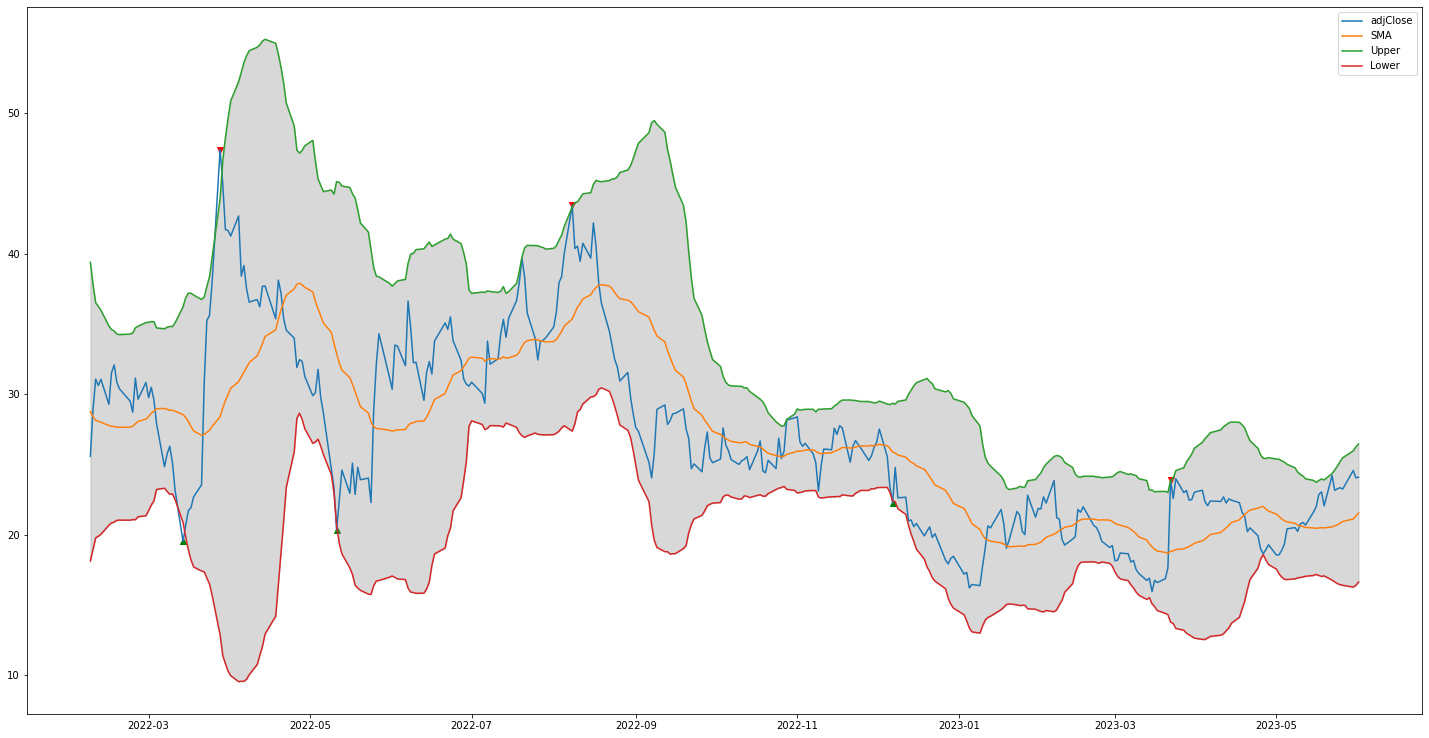

In [6]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['adjClose', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].adjClose, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].adjClose, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['adjClose', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

## Calculate profit made by this strategy

In [7]:
# Calculate total profit

share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].adjClose * share)
    profit = profit + (df.iloc[sell[i]].adjClose * share)
    
profit

52597.5

## Calculate return rate made by this strategy

In [8]:
# Close price at the beginning of the time period 
C0 = df.iloc[0]['adjClose']
C0

25.585

In [9]:
# Calculate return rate (i.e. total profits divided 1000 shares times initial stock price) (%)
RR = profit / (1000*C0) 
print('%.2f%%' %(RR*100))

205.58%
